# UZOP Lovro Krčelić
### Text Classification using String Kernels
Data overview of main tags in .sgm files

#
## File reading
All files mashed up in one in order to apply calculations

In [33]:
import os
from bs4 import BeautifulSoup


# Define the directory where your files are located
directory = 'dataset/reuters21578/'

# List to hold the content of all files
all_content = []

# Loop through all files with .sgm extension
for filename in os.listdir(directory):
    if filename.endswith('.sgm'):
        # Construct full file path
        file_path = os.path.join(directory, filename)
        # Open and read the file
        with open(file_path, 'r', encoding='latin1') as file:
            file_content = file.read()
            # Append the content to the list
            all_content.append(file_content)

# Concatenate all content into a single string
combined_content = ' '.join(all_content)

# Parse the file content with BeautifulSoup
parsed_content = BeautifulSoup(combined_content, 'html.parser')


#
## Exchanges tag analysis
- Number of distinct values
- Number of empty tags
- Plot value frequencies

Number of distinct values in 'Exchanges': 32
Number of empty tags:  21096


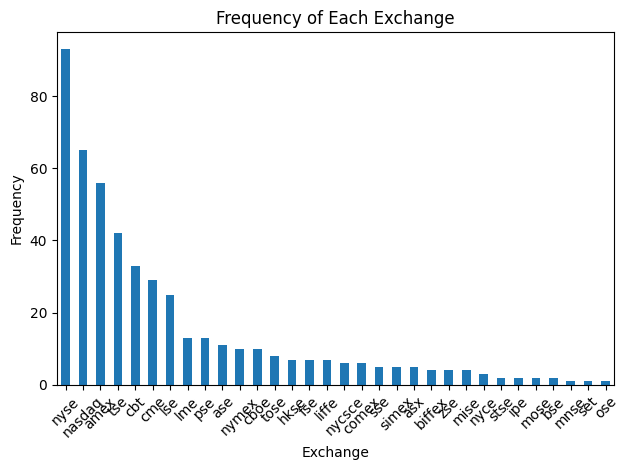

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Find all <EXCHANGES> tags
exchanges_elements = parsed_content.find_all('exchanges')

# Extract data from <EXCHANGES> tags, including empty ones
exchanges = []
for body in exchanges_elements:
    if body.find('d'):
        exchanges.append(body.d.text)
    else:
        # Append None or np.nan (from numpy) to indicate a missing value
        exchanges.append(None)

# Load data into a pandas DataFrame
df = pd.DataFrame(exchanges, columns=['Exchanges'])

distinct_count = df['Exchanges'].nunique()
print("Number of distinct values in 'Exchanges':", distinct_count)

# Check for missing values
missing_values = df.isnull().sum().item()
print("Number of empty tags: ", missing_values)

# If there are no exchanges to plot, we skip plotting
if df['Exchanges'].notnull().sum() == 0:
    print("No exchange data to plot.")
else:
    # Visualize the frequency of each exchange category with a bar chart
    df['Exchanges'].value_counts().plot(kind='bar')  # dropna=False to include missing values in the count
    plt.title('Frequency of Each Exchange')
    plt.xlabel('Exchange')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
    plt.tight_layout()  # Adjust layout so everything fits without overlapping
    plt.show()


#
## People tag analysis
- Number of distinct values
- Number of empty tags
- Plot top 10 value frequencies

Number of distinct values in 'people': 114
Number of empty tags:  20422


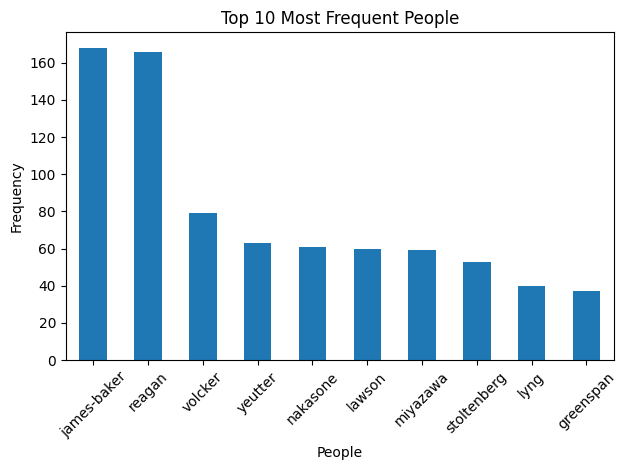

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Find all <EXCHANGES> tags
people_elements = parsed_content.find_all('people')

# Extract data from <EXCHANGES> tags, including empty ones
# Loop through all <PEOPLE> tags
people_names = []
for people in people_elements:
    # Find all <D> tags within each <PEOPLE> tag
    d_tags = people.find_all('d')
    if d_tags:
        # Extract the text from each <D> tag and append to the list
        for d in d_tags:
            people_names.append(d.text)
    else:
        # If no <D> tags are found, indicate a missing value
        people_names.append(None)

# Load data into a pandas DataFrame
people_df = pd.DataFrame(people_names, columns=['people'])

distinct_count = people_df['people'].nunique()
print("Number of distinct values in 'people':", distinct_count)

# Check for missing values
missing_values = people_df.isnull().sum().item()
print("Number of empty tags: ", missing_values)

if people_df['people'].notnull().sum() == 0:
    print("No people data to plot.")
else:
    # Get the top 10 most common people categories
    top_people = people_df['people'].value_counts().head(10)

    # Visualize the frequency of each of the top 10 people categories with a bar chart
    top_people.plot(kind='bar')
    plt.title('Top 10 Most Frequent People')
    plt.xlabel('People')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
    plt.tight_layout()  # Adjust layout so everything fits without overlapping
    plt.show()


#
## Topics tag analysis
- Number of distinct values
- Number of empty tags
- plot top 10 value frequencies

Number of distinct values in 'topics': 82
Number of empty tags:  10211


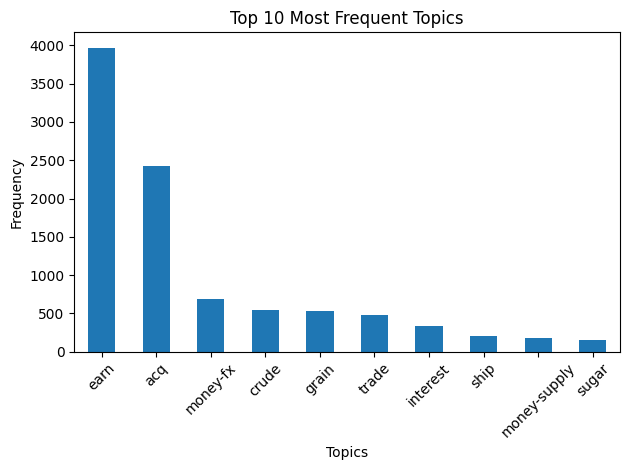

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Find all <EXCHANGES> tags
people_elements = parsed_content.find_all('topics')

# Extract data from <EXCHANGES> tags, including empty ones
topics = []
for body in people_elements:
    if body.find('d'):
        topics.append(body.d.text)
    else:
        # Append None or np.nan (from numpy) to indicate a missing value
        topics.append(None)

# Load data into a pandas DataFrame
topics_df = pd.DataFrame(topics, columns=['topics'])

distinct_count = topics_df['topics'].nunique()
print("Number of distinct values in 'topics':", distinct_count)

# Check for missing values
missing_values = topics_df.isnull().sum().item()
print("Number of empty tags: ", missing_values)

# If there are no topics to plot, we skip plotting
if topics_df['topics'].notnull().sum() == 0:
    print("No exchange data to plot.")
else:
    # Get the top 10 most common people categories
    top_topics = topics_df['topics'].value_counts().head(10)

    # Visualize the frequency of each of the top 10 people categories with a bar chart
    top_topics.plot(kind='bar')
    plt.title('Top 10 Most Frequent Topics')
    plt.xlabel('Topics')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
    plt.tight_layout()  # Adjust layout so everything fits without overlapping
    plt.show()


#
## Places tag analysis
- Number of distinct values
- Number of empty tags
- plot top 10 value frequencies

Number of distinct values in 'places': 114
Number of empty tags:  2780


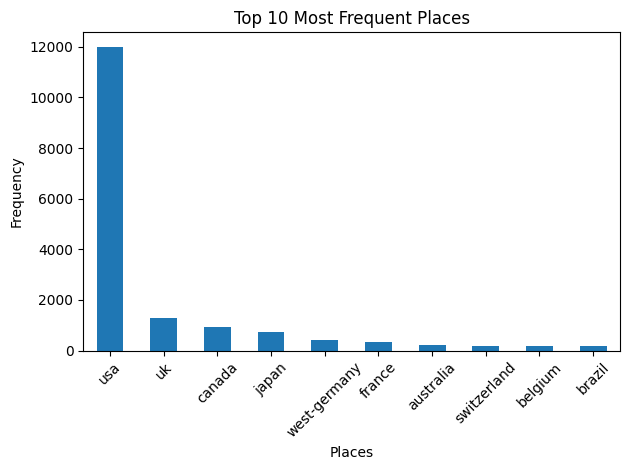

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Find all <EXCHANGES> tags
people_elements = parsed_content.find_all('places')

# Extract data from <EXCHANGES> tags, including empty ones
places = []
for body in people_elements:
    if body.find('d'):
        places.append(body.d.text)
    else:
        # Append None or np.nan (from numpy) to indicate a missing value
        places.append(None)

# Load data into a pandas DataFrame
places_df = pd.DataFrame(places, columns=['places'])

distinct_count = places_df['places'].nunique()
print("Number of distinct values in 'places':", distinct_count)

# Check for missing values
missing_values = places_df.isnull().sum().item()
print("Number of empty tags: ", missing_values)

# If there are no places to plot, we skip plotting
if places_df['places'].notnull().sum() == 0:
    print("No exchange data to plot.")
else:
    # Get the top 10 most common people categories
    top_places = places_df['places'].value_counts().head(10)

    # Visualize the frequency of each of the top 10 people categories with a bar chart
    top_places.plot(kind='bar')
    plt.title('Top 10 Most Frequent Places')
    plt.xlabel('Places')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
    plt.tight_layout()  # Adjust layout so everything fits without overlapping
    plt.show()


#
## Orgs tag analysis
- Number of distinct values
- Number of empty tags
- Plot top 10 value frequencies

Number of distinct values in 'orgs': 31
Number of empty tags:  20697


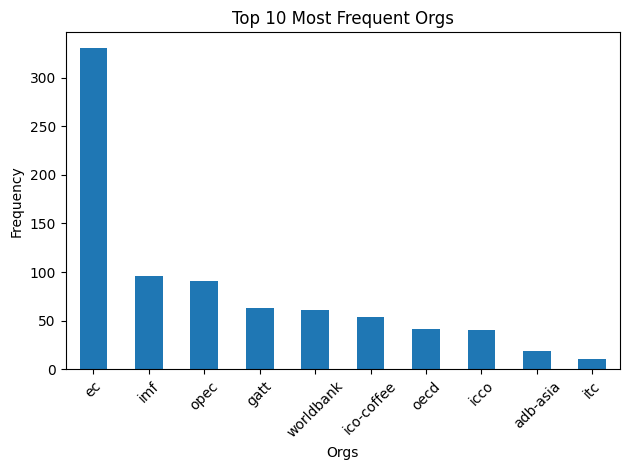

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Find all <EXCHANGES> tags
people_elements = parsed_content.find_all('orgs')

# Extract data from <EXCHANGES> tags, including empty ones
orgs = []
for body in people_elements:
    if body.find('d'):
        orgs.append(body.d.text)
    else:
        # Append None or np.nan (from numpy) to indicate a missing value
        orgs.append(None)

# Load data into a pandas DataFrame
orgs_df = pd.DataFrame(orgs, columns=['orgs'])

distinct_count = orgs_df['orgs'].nunique()
print("Number of distinct values in 'orgs':", distinct_count)

# Check for missing values
missing_values = orgs_df.isnull().sum().item()
print("Number of empty tags: ", missing_values)

# If there are no orgs to plot, we skip plotting
if orgs_df['orgs'].notnull().sum() == 0:
    print("No exchange data to plot.")
else:
    # Get the top 10 most common people categories
    top_orgs = orgs_df['orgs'].value_counts().head(10)

    # Visualize the frequency of each of the top 10 people categories with a bar chart
    top_orgs.plot(kind='bar')
    plt.title('Top 10 Most Frequent Orgs')
    plt.xlabel('Orgs')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
    plt.tight_layout()  # Adjust layout so everything fits without overlapping
    plt.show()


#
## BODY tag analysis
- Number of empty tags
- Number of all words
- Number of distinct words
- Plot top 10 word frequencies (stopwords excluded)

Number of empty tags:  0
Total number of words: 1721976
Number of distinct words: 103966


C:\Users\lkrcelic\PycharmProjects\pythonProject1\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


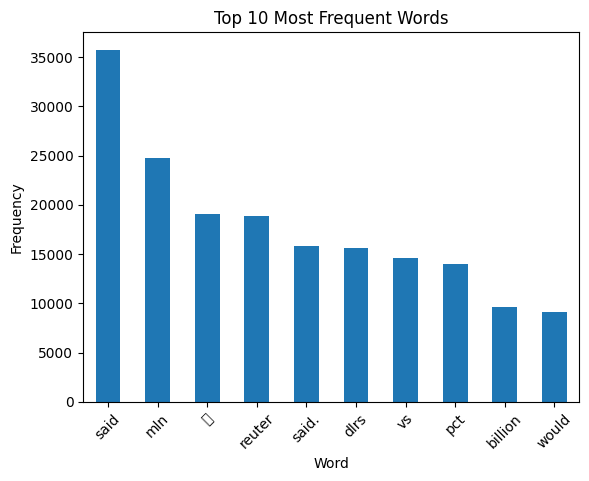

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
##nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter


# Find all <BODY> tags
body_elements = parsed_content.find_all('body')

# Extract data from <BODY> tags, including empty ones
bodies = []
for body in body_elements:
    if body.text:
        bodies.append(body.text)
    else:
        # Append None or np.nan (from numpy) to indicate a missing value
        bodies.append(None)

# Load data into a pandas DataFrame
bodies_df = pd.DataFrame(bodies, columns=['body'])

# Define the English stop words list
stop_words = set(stopwords.words('english'))

# Assuming 'body' is the column with the text data in your DataFrame
# This step will tokenize the text into words, remove stop words, and count them
bodies_df['body'] = bodies_df['body'].str.lower().str.split()  # Convert to lowercase and split into words
bodies_df['body'] = bodies_df['body'].apply(lambda x: [word for word in x if word not in stop_words])  # Remove stop words

# Flatten the list of words and count them
word_counts = Counter(word for sublist in bodies_df['body'] for word in sublist)

# If you want to put the word counts back into a DataFrame:
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by 'Count' to see the most common words
word_counts_df.sort_values(by='Count', ascending=False, inplace=True)
word_counts_df.reset_index(drop=True, inplace=True)


missing_values = bodies_df.isnull().sum().item()
print("Number of empty tags: ", missing_values)


# Flatten the list of lists into a single list of words
all_words = [word for sublist in bodies_df['body'] for word in sublist]

# Calculate the total number of words
total_words = len(all_words)

# Calculate the number of distinct words
distinct_words = len(set(all_words))

print(f"Total number of words: {total_words}")
print(f"Number of distinct words: {distinct_words}")

top_ten = word_counts.most_common(10)

# Convert the top ten to a DataFrame for easy plotting
top_ten_df = pd.DataFrame(top_ten, columns=['Word', 'Count'])


# Plot the top ten words
fig, ax = plt.subplots()
top_ten_df.plot.bar(x='Word', y='Count', legend=False, ax=ax)
ax.set_title('Top 10 Most Frequent Words')
ax.set_ylabel('Frequency')
ax.set_xlabel('Word')
plt.xticks(rotation=45)
plt.show()
